In [38]:
import pandas as pd
import numpy as np
import re

from _lib.preprocess import preprocess_missing as prep
from _lib.preprocess import get_instruction as info

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [39]:
test_data = pd.read_csv("_database/Input/test.csv", index_col = 0)
train_data = pd.read_csv("_database/Input/train.csv", index_col = 0)

In [40]:
test = prep(test_data)
train = prep(train_data)

C:\Anaconda\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [41]:
def var_missing(df):
    missing_values = df.isna().apply(sum)[df.isna().apply(sum) > 0].sort_values()
    return pd.DataFrame({"Missing": missing_values})

In [42]:
# All the missing values before prep
var_missing(test_data)

,Missing
TotalBsmtSF,1
GarageArea,1
GarageCars,1
KitchenQual,1
BsmtUnfSF,1
BsmtFinSF2,1
BsmtFinSF1,1
SaleType,1
Exterior1st,1
Exterior2nd,1


In [43]:
# All the missing values after prep
var_missing(test)

,Missing
SaleType,1
Exterior1st,1
Exterior2nd,1
GarageArea,1
BsmtFinSF1,1
BsmtFinSF2,1
BsmtUnfSF,1
TotalBsmtSF,1
GarageCars,1
KitchenQual,1


In [44]:
var_missing(train)

,Missing


After prep, we still have some missing values. Further analysis needed

#### MSZoning

In [45]:
test[test["MSZoning"].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1916,30,NaN,109.000000,21780,Grvl,NA,Reg,Lvl,NaN,Inside,...,0,0,NA,NA,NA,0,3,2009,ConLD,Normal
2217,20,NaN,80.000000,14584,Pave,NA,Reg,Low,AllPub,Inside,...,0,0,NA,NA,NA,0,2,2008,WD,Abnorml
2251,70,NaN,68.566667,56600,Pave,NA,IR1,Low,AllPub,Inside,...,0,0,NA,NA,NA,0,1,2008,WD,Normal
2905,20,NaN,125.000000,31250,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,5,2006,WD,Normal


In [46]:
info("MSZoning", output = False)

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	


[]

In [47]:
numcol = pd.read_csv("_database/numcol.csv")
numcol["Num_col"]

0       LotFrontage
1           LotArea
2         YearBuilt
3      YearRemodAdd
4        MasVnrArea
5        BsmtFinSF1
6        BsmtFinSF2
7         BsmtUnfSF
8       TotalBsmtSF
9          1stFlrSF
10         2ndFlrSF
11     LowQualFinSF
12        GrLivArea
13     BsmtFullBath
14     BsmtHalfBath
15         FullBath
16         HalfBath
17     BedroomAbvGr
18     KitchenAbvGr
19     TotRmsAbvGrd
20       Fireplaces
21      GarageYrBlt
22       GarageCars
23       GarageArea
24       WoodDeckSF
25      OpenPorchSF
26    EnclosedPorch
27        3SsnPorch
28      ScreenPorch
29         PoolArea
30          MiscVal
31           MoSold
32           YrSold
Name: Num_col, dtype: object

C:\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`m

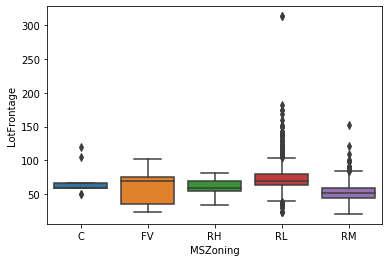

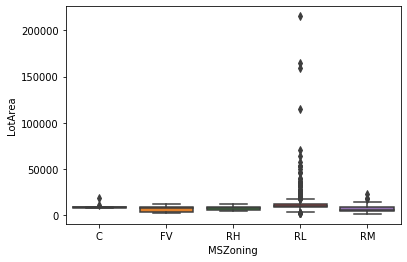

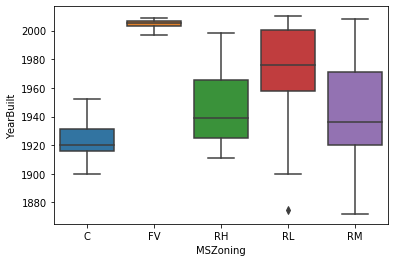

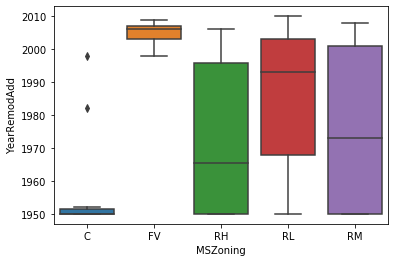

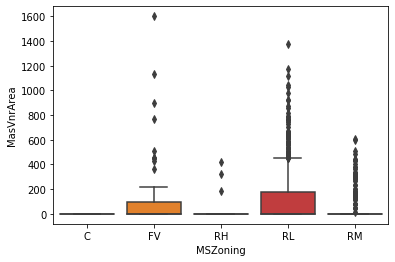

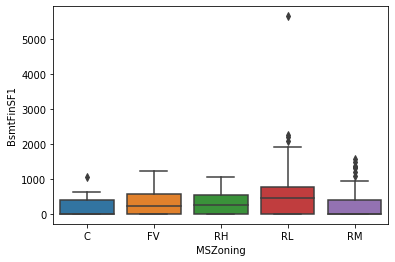

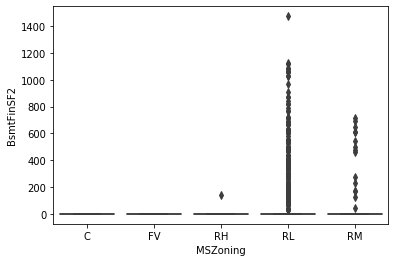

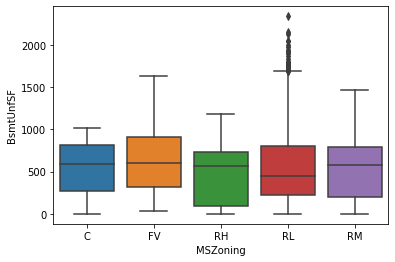

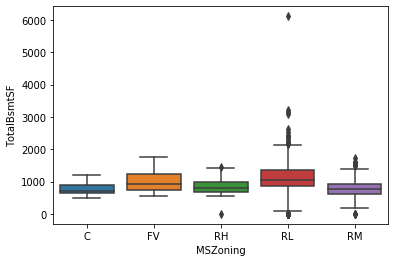

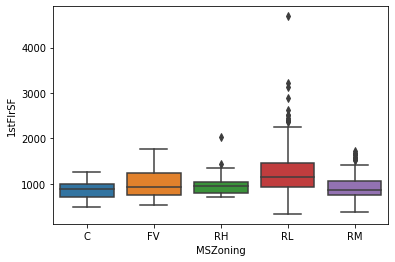

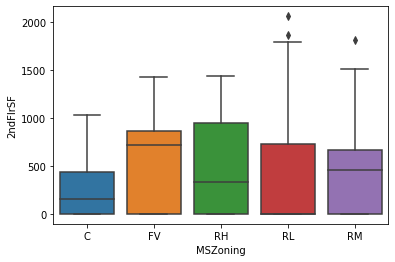

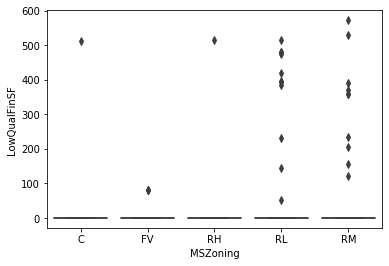

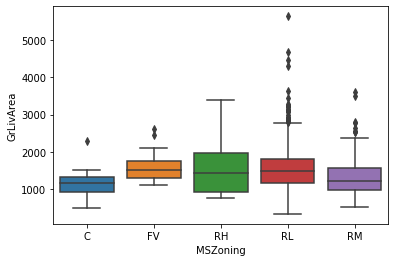

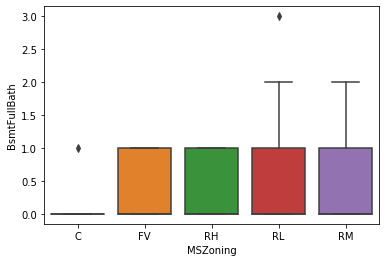

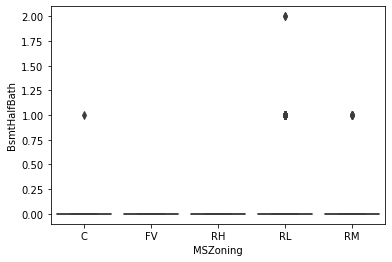

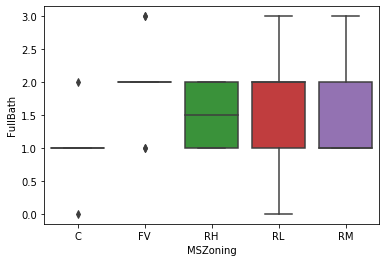

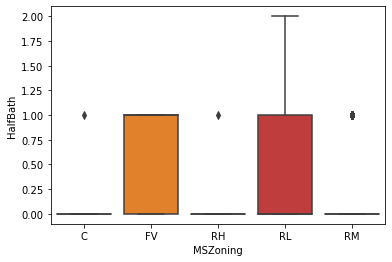

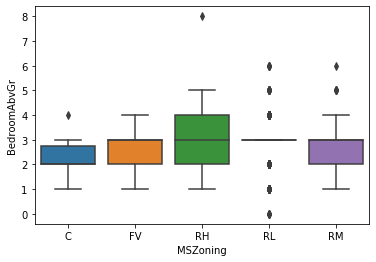

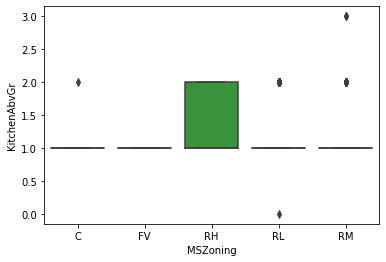

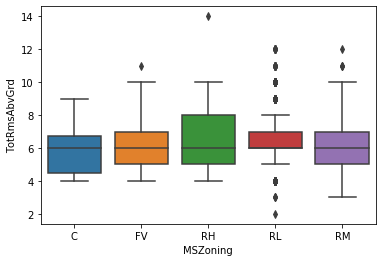

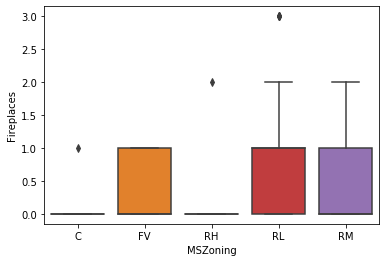

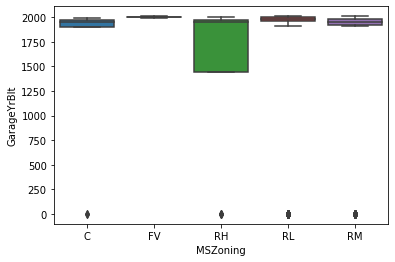

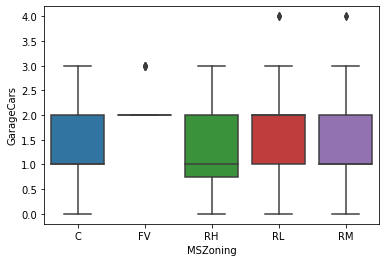

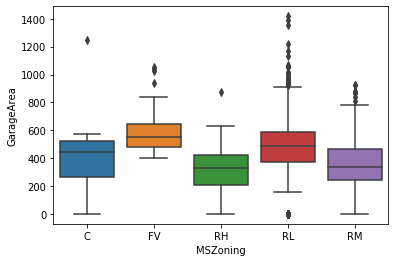

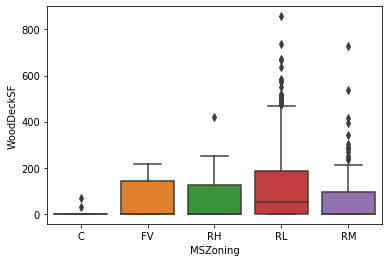

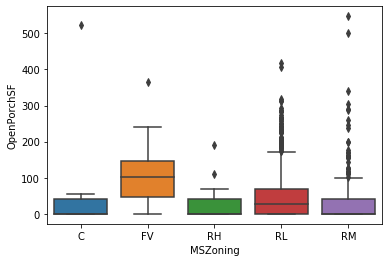

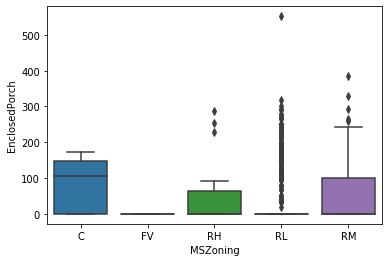

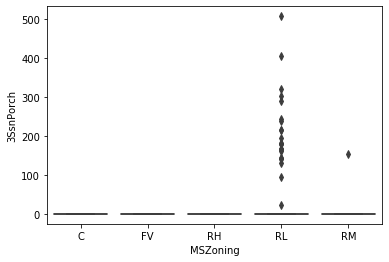

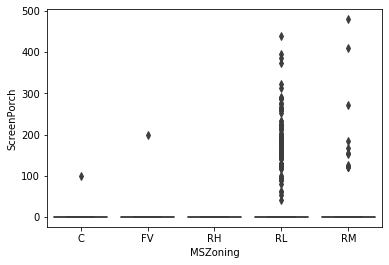

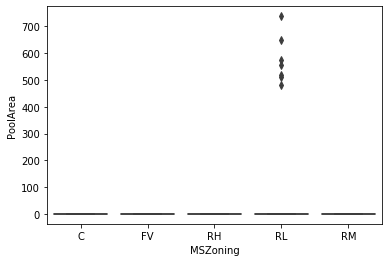

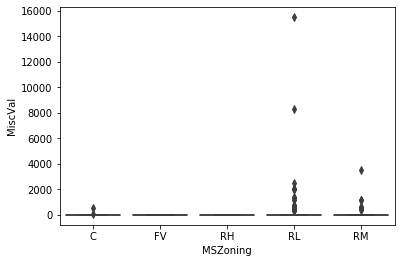

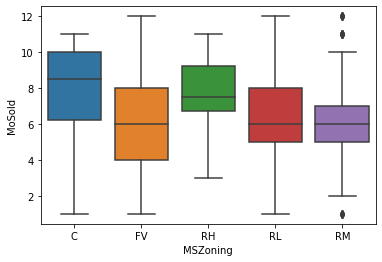

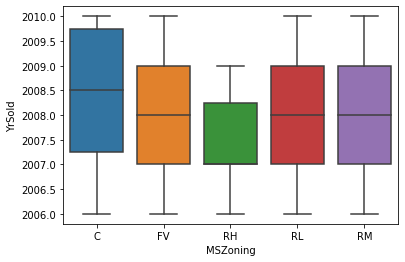

In [48]:
# View the boxplot for all numerical features with MSZoning in training set
for col in numcol["Num_col"].values:
    plt.figure()
    sns.boxplot(x = train["MSZoning"], y = train[col])

Variable year built is the best features to predict the MSZoning missing values 

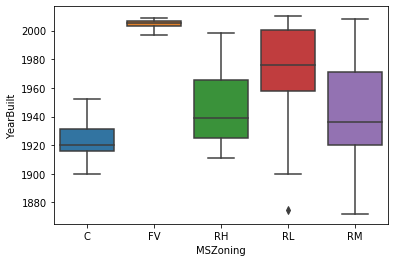

In [49]:
sns.boxplot(x = train["MSZoning"], y = train["YearBuilt"])

In [50]:
year = pd.DataFrame(test[test["MSZoning"].isna()]["YearBuilt"])
print(year)

      YearBuilt
Id             
1916       1910
2217       1952
2251       1900
2905       1951


We assigned MSZoning to the highest probability of getting MSZoning given yearbuilt

In [51]:
df = train[["MSZoning", "YearBuilt"]]

In [52]:
by_mszoning = df.groupby("MSZoning")
mean_std = by_mszoning.apply(lambda x : (np.mean(x), np.std(x)))
print(mean_std)

MSZoning
C                 ([1924.1], [15.642570121306793])
FV    ([2004.5076923076922], [3.3792264791861957])
RH             ([1945.6875], [27.305491091536883])
RL     ([1975.387630662021], [25.998299735939604])
RM     ([1943.2568807339449], [33.29280817997652])
dtype: object


In [53]:
for idx in mean_std.index:
    year[idx] = np.abs((year["YearBuilt"] - mean_std[idx][0].values[0]) / mean_std[idx][1].values[0])

In [54]:
print(year)

      YearBuilt         C         FV        RH        RL        RM
Id                                                                
1916       1910  0.901386  27.967256  1.306972  2.515073  0.998921
2217       1952  1.783594  15.538376  0.231181  0.899583  0.262613
2251       1900  1.540668  30.926513  1.673198  2.899714  1.299286
2905       1951  1.719666  15.834302  0.194558  0.938047  0.232576


In [55]:
year["MIN"] = year.columns[1:][np.argmin(year.drop("YearBuilt", axis = 1).values, axis = 1)].values

In [56]:
print(year)

      YearBuilt         C         FV        RH        RL        RM MIN
Id                                                                    
1916       1910  0.901386  27.967256  1.306972  2.515073  0.998921   C
2217       1952  1.783594  15.538376  0.231181  0.899583  0.262613  RH
2251       1900  1.540668  30.926513  1.673198  2.899714  1.299286  RM
2905       1951  1.719666  15.834302  0.194558  0.938047  0.232576  RH


In [57]:
test.loc[test["MSZoning"].isna(), "MSZoning"] = year["MIN"]

In [58]:
var_missing(test)

,Missing
SaleType,1
Exterior1st,1
Exterior2nd,1
BsmtFinSF1,1
BsmtFinSF2,1
BsmtUnfSF,1
TotalBsmtSF,1
GarageArea,1
GarageCars,1
KitchenQual,1


#### Bsmt

In [59]:
test.loc[test["BsmtFinSF1"].isna(), ["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtHalfBath",
                                    "BsmtFullBath", "BsmtCond"]]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtHalfBath,BsmtFullBath,BsmtCond
Id,,,,,,,
2121,NaN,NaN,NaN,NaN,NaN,NaN,NA


In [60]:
info("BsmtCond", output = False)

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	


[]

In [61]:
info("BsmtFinSF1", output = False)

BsmtFinSF1: Type 1 finished square feet



[]

In [62]:
np.sum(train["BsmtFinSF1"] == 0)

465

In [63]:
info("BsmtFinSF2", output = False)

BsmtFinSF2: Type 2 finished square feet



[]

In [64]:
np.sum(train["BsmtFinSF2"] == 0)

1291

From the basement condition "NA", we know that this observation doesn't have basement. So we can assign value 0 to the NaN values on the other features.

In [65]:
bsmt_nan = test.columns[(test.loc[test["BsmtFinSF1"].isna(),].isna()).values[0]]
print(bsmt_nan)

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath'],
      dtype='object')


In [126]:
[info(col, output = False) for col in bsmt_nan]

BsmtFinSF1: Type 1 finished square feet

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms



[[], [], [], [], [], []]

In [66]:
# Changing the values to 0
test.loc[test["BsmtFinSF1"].isna(), bsmt_nan.values] = 0

In [67]:
var_missing(test)

,Missing
Exterior1st,1
Exterior2nd,1
BsmtFullBath,1
BsmtHalfBath,1
KitchenQual,1
GarageCars,1
GarageArea,1
SaleType,1
Utilities,2
Functional,2


In [68]:
test.loc[test["BsmtCond"].isna(), ["Bsmt" in col for col in test.columns]]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
2041,Gd,NaN,Mn,GLQ,1044.0,Rec,382.0,0.0,1426.0,1.0,0.0
2186,TA,NaN,No,BLQ,1033.0,Unf,0.0,94.0,1127.0,0.0,1.0
2525,TA,NaN,Av,ALQ,755.0,Unf,0.0,240.0,995.0,0.0,0.0


Looks like the observations with the basement condition NAN have a basement. So we can Impute with the most frequent values

In [69]:
train["BsmtCond"].value_counts()

TA    1308
Gd      65
Fa      45
NA      37
Po       2
Name: BsmtCond, dtype: int64

Here we see the TA is the most frequent category on BsmtCond feature

In [70]:
test.loc[test["BsmtCond"].isna(), "BsmtCond"] = "TA"

In [71]:
test.loc[test["BsmtFullBath"].isna(), ["Bsmt" in col for col in test.columns]]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
2189,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,NaN,NaN


In [72]:
info("BsmtFullBath", output = False)

BsmtFullBath: Basement full bathrooms



[]

We assign 0 for the missing value in BsmtFullBath and BsmtHalfBath because the observation doesn't have basement

In [73]:
test.loc[test["BsmtHalfBath"].isna(), ["BsmtHalfBath", "BsmtFullBath"]] = 0

In [74]:
var_missing(test)

,Missing
Exterior1st,1
Exterior2nd,1
KitchenQual,1
GarageCars,1
GarageArea,1
SaleType,1
Utilities,2
Functional,2
GarageFinish,2
GarageQual,2


#### Exterior

In [76]:
test.loc[test["Exterior1st"].isna(), ["Exterior" in col for col in test.columns]]

,Exterior1st,Exterior2nd
Id,,
2152,NaN,NaN


In [78]:
info("Exterior1st", output = False)

Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       WdSdng	Wood Siding
       WdShing	Wood Shingles
	


[]

Here, we don't see NA result because every house has its own exterior cover. So we fill the missing value with the most frequent categories

In [79]:
train["Exterior1st"].value_counts()

VinylSd    512
HdBoard    222
MetalSd    220
WdSdng     206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

In [81]:
train["Exterior2nd"].value_counts()

VinylSd    501
MetalSd    214
HdBoard    207
WdSdng     197
Plywood    142
CemntBd     60
WdShing     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
BrkComm      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [83]:
test.loc[test["Exterior1st"].isna(), ["Exterior1st", "Exterior2nd"]] = "VinylSd"

In [84]:
var_missing(test)

,Missing
KitchenQual,1
GarageCars,1
GarageArea,1
SaleType,1
Utilities,2
Functional,2
GarageFinish,2
GarageQual,2
GarageCond,2


#### Garage

In [86]:
test.loc[test["GarageCars"].isna(), ["Garage" in col for col in test.columns]]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
2577,Detchd,0,NaN,NaN,NaN,NaN,NaN


In [88]:
info("GarageType", output = False)

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		


[]

In [89]:
info("GarageCond")

['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']

In [90]:
test["GarageType"].value_counts()

Attchd     851
Detchd     392
BuiltIn     98
NA          76
Basment     17
2Types      17
CarPort      6
Name: GarageType, dtype: int64

Here, we have 2 possibilities, there isn't enough information for the garage or there is no garage (value Detchd should be NA). Either way, we can just change Detchd to NA. 

In [94]:
[info(col, output = False) for col in test.columns if "Garage" in col]

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		


[[], [], [], [], [], [], []]

In [96]:
vals = ["NA", 0, "NA", 0, 0, "NA", "NA"]
test.loc[test["GarageCars"].isna(), ["Garage" in col for col in test.columns]] = vals

In [98]:
var_missing(test)

,Missing
KitchenQual,1
GarageFinish,1
GarageQual,1
GarageCond,1
SaleType,1
Utilities,2
Functional,2


In [99]:
test.loc[test["GarageFinish"].isna(), ["Garage" in col for col in test.columns]]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
2127,Detchd,0,NaN,1.0,360.0,NaN,NaN


Since some garage features in this observation are missing, we can put no garage for this house.

In [100]:
test.loc[test["GarageFinish"].isna(), ["Garage" in col for col in test.columns]] = vals

In [101]:
var_missing(test)

,Missing
KitchenQual,1
SaleType,1
Utilities,2
Functional,2


#### Other

In [106]:
info("KitchenQual", output = False)

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	


[]

In [108]:
info("SaleType", output = False)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		


[]

In [110]:
info("Utilities", output = False)

Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	


[]

In [111]:
info("Functional", output = False)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		


[]

These features don't have NA categories. Therefore we assign the missing value with the most frequent one

In [112]:
features_na = ["KitchenQual", "SaleType", "Utilities", "Functional"]

In [119]:
for col in features_na:
    val = train[col].value_counts().index[0]
    test.loc[test[col].isna(), col] = val
    print("{} has been assigned for the missing {}".format(val, col))

TA has been assigned for the missing KitchenQual
WD has been assigned for the missing SaleType
AllPub has been assigned for the missing Utilities
Typ has been assigned for the missing Functional


In [125]:
var_missing(test)

,Missing
